In [1]:
from evaldet import Tracks, MOTMetrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


pd.set_option('precision', 2)

print(plt.rcParams["figure.figsize"])

[6.4, 4.8]


In [2]:

gt_tracks = Tracks.from_mot('./DATA/output_4_gt.txt')
tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_kalman.txt')

eval_obj = MOTMetrics(clearmot_dist_threshold=0.5, id_dist_threshold=0.5)

In [3]:
metrics = eval_obj.compute(gt_tracks, tracks, clearmot_metrics=True, id_metrics=True, hota_metrics=True)
metrics['clearmot']['MOTP'] = 1 - metrics['clearmot']['MOTP']

In [4]:
print('CLEARMOT')
print(pd.DataFrame(metrics['clearmot'], index=['values']))
print('-' * 10)
print('IDs')
print(pd.DataFrame(metrics['id'], index=['values']))
print('-' * 10)
print('HOTA')
print(pd.DataFrame({k : v for k, v in metrics['hota'].items() if k in ['HOTA', 'DetA', 'AssA', 'LocA']}, index=['values']))

CLEARMOT
        MOTP  MOTA  FP_CLEAR  FN_CLEAR  IDSW
values  0.65  0.12     12967     13763    89
----------
IDs
         IDTP   IDFP   IDFN   IDP   IDR  IDF1
values  14364  15233  16029  0.49  0.47  0.48
----------
HOTA
        HOTA  DetA  AssA  LocA
values  0.41  0.44  0.38  0.68


In [5]:
print('-' * 10)
print('HOTA alpha')

new = '_\\'
hota_alpha = pd.DataFrame({fr"${k.replace('_', new)}$" : v for k, v in metrics['hota'].items() if k not in ['HOTA', 'DetA', 'AssA', 'LocA', 'alphas_HOTA']}, index=metrics['hota']['alphas_HOTA'])
print(hota_alpha)

----------
HOTA alpha
      $HOTA_\alpha$  $DetA_\alpha$  $AssA_\alpha$  $LocA_\alpha$
0.05       1.35e-03       1.17e-04           0.02           0.96
0.10       5.83e-03       2.04e-03           0.02           0.92
0.15       1.48e-02       8.69e-03           0.03           0.88
0.20       2.90e-02       2.27e-02           0.04           0.85
0.25       5.53e-02       4.80e-02           0.06           0.81
0.30       9.45e-02       8.80e-02           0.10           0.77
0.35       1.46e-01       1.41e-01           0.15           0.74
0.40       2.13e-01       2.11e-01           0.22           0.71
0.45       2.89e-01       2.91e-01           0.29           0.68
0.50       3.73e-01       3.84e-01           0.36           0.65
0.55       4.61e-01       4.84e-01           0.44           0.62
0.60       5.55e-01       5.89e-01           0.52           0.60
0.65       6.41e-01       6.90e-01           0.60           0.58
0.70       7.19e-01       7.84e-01           0.66           0.56
0.7

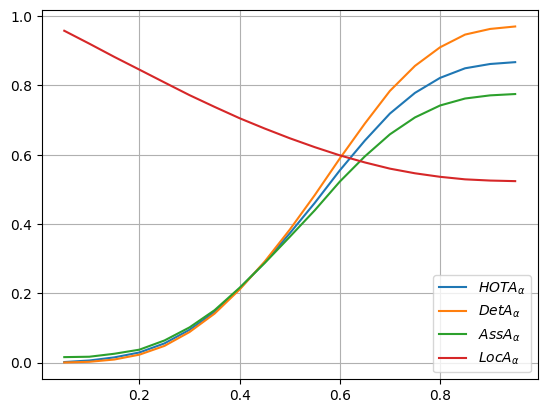

In [6]:
fig = hota_alpha.plot.line()
fig.grid(True)